In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

In [118]:
df_01 = pd.read_csv("data_preprocessed\\01_application_train.csv")
df_02 = pd.read_csv("data_preprocessed\\02_previous_application.csv")
df_03 = pd.read_csv("data_preprocessed\\03-04_bureau_balance_merge_bureau.csv")
df_05 = pd.read_csv("data_preprocessed\\05_pos_cash_balance.csv")
df_06 = pd.read_csv("data_preprocessed\\06_instalment_payment.csv")
df_07 = pd.read_csv("data_preprocessed\\07_credit_cash_balance.csv")

In [119]:
df_01

,SK_ID_CURR,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,EXT_SOURCE_2,EXT_SOURCE_3,REGION_RATING_CLIENT.1,REGION_RATING_CLIENT_W_CITY.1,REG_REGION_NOT_WORK_REGION.1,REG_CITY_NOT_LIVE_CITY.1,REG_CITY_NOT_WORK_CITY.1,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,REGION_POPULATION_RELATIVE
0,100002,24700.5,202500.0,406597.5,351000.0,Cash loans,House / apartment,0,0,0,...,0.262949,0.139376,2,2,0,0,0,2.0,2.0,0.018801
1,100003,35698.5,270000.0,1293502.5,1129500.0,Cash loans,House / apartment,0,0,0,...,0.622246,NaN,1,1,0,0,0,1.0,0.0,0.003541
2,100004,6750.0,67500.0,135000.0,135000.0,Revolving loans,House / apartment,0,0,0,...,0.555912,0.729567,2,2,0,0,0,0.0,0.0,0.010032
3,100006,29686.5,135000.0,312682.5,297000.0,Cash loans,House / apartment,0,0,0,...,0.650442,NaN,2,2,0,0,0,2.0,0.0,0.008019
4,100007,21865.5,121500.0,513000.0,513000.0,Cash loans,House / apartment,0,0,1,...,0.322738,NaN,2,2,0,0,1,0.0,0.0,0.028663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,27558.0,157500.0,254700.0,225000.0,Cash loans,With parents,0,0,0,...,0.681632,NaN,1,1,0,0,0,0.0,0.0,0.032561
307503,456252,12001.5,72000.0,269550.0,225000.0,Cash loans,House / apartment,0,0,0,...,0.115992,NaN,2,2,0,0,0,0.0,0.0,0.025164
307504,456253,29979.0,153000.0,677664.0,585000.0,Cash loans,House / apartment,0,0,1,...,0.535722,0.218859,3,3,0,0,1,6.0,0.0,0.005002
307505,456254,20205.0,171000.0,370107.0,319500.0,Cash loans,House / apartment,0,1,1,...,0.514163,0.661024,2,2,0,1,1,0.0,0.0,0.005313


In [120]:
df_02

,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_ANNUITY_SUM,PREV_AMT_ANNUITY_MIN,PREV_AMT_ANNUITY_MAX,PREV_AMT_APPLICATION_MEAN,PREV_AMT_APPLICATION_SUM,PREV_AMT_APPLICATION_MIN,PREV_AMT_APPLICATION_MAX,PREV_AMT_CREDIT_MEAN,...,PREV_INTEREST_RATE_MEAN,PREV_INTEREST_RATE_MIN,PREV_INTEREST_RATE_MAX,PREV_IS_APPROVED_FLAG_COUNT,PREV_IS_REFUSED_FLAG_COUNT,PREV_IS_CONS_LOAN_FLAG_COUNT,PREV_IS_CASH_LOAN_FLAG_COUNT,PREV_IS_REVOL_LOAN_FLAG_COUNT,PREV_IS_POS_PORTFOLIO_FLAG_COUNT,PREV_IS_CASH_PORTFOLIO_FLAG_COUNT
0,100001,3951.000000,3951.000,3951.000,3951.000,24835.500,24835.5,24835.5,24835.5,23787.00,...,0.036534,0.036534,0.036534,1,1,1,1,1,1,1
1,100002,9251.775000,9251.775,9251.775,9251.775,179055.000,179055.0,179055.0,179055.0,179055.00,...,0.009603,0.009603,0.009603,1,1,1,1,1,1,1
2,100003,56553.990000,169661.970,6737.310,98356.995,435436.500,1306309.5,68809.5,900000.0,484191.00,...,0.013690,0.010723,0.015886,3,3,3,3,3,3,3
3,100004,5357.250000,5357.250,5357.250,5357.250,24282.000,24282.0,24282.0,24282.0,20106.00,...,0.013161,0.013161,0.013161,1,1,1,1,1,1,1
4,100005,2406.600000,4813.200,0.000,4813.200,22308.750,44617.5,0.0,44617.5,20076.75,...,0.016863,0.000000,0.033727,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338852,456251,6605.910000,6605.910,6605.910,6605.910,40455.000,40455.0,40455.0,40455.0,40455.00,...,0.034037,0.034037,0.034037,1,1,1,1,1,1,1
338853,456252,10074.465000,10074.465,10074.465,10074.465,57595.500,57595.5,57595.5,57595.5,56821.50,...,0.009115,0.009115,0.009115,1,1,1,1,1,1,1
338854,456253,4770.405000,9540.810,3973.095,5567.715,24162.750,48325.5,19413.0,28912.5,20625.75,...,0.029920,0.027923,0.031916,2,2,2,2,2,2,2
338855,456254,10681.132500,21362.265,2296.440,19065.825,121317.750,242635.5,18846.0,223789.5,134439.75,...,0.023465,0.013701,0.033230,2,2,2,2,2,2,2


In [121]:
df_03

,SK_ID_CURR,BUR_MEAN_DAYS_CREDIT,BUR_MEAN_CREDIT_DAY_OVERDUE,BUR_MEAN_AMT_CREDIT_MAX_OVERDUE,BUR_MEAN_CNT_CREDIT_PROLONG,BUR_MEAN_AMT_CREDIT_SUM,BUR_MEAN_AMT_CREDIT_SUM_DEBT,BUR_MEAN_AMT_CREDIT_SUM_LIMIT,BUR_MEAN_AMT_CREDIT_SUM_OVERDUE,BUR_MEAN_DEBT_CREDIT_RATIO,BUR_MEAN_OVERDUE,BUR_MEAN_PAST_LOAN_COUNT,BUR_MEAN_CREDIT_TYPE_COUNT,BUR_MEAN_ACTIVE_LOANS_PERCENTAGE,BUR_MEAN_BUR_BAL_MEAN_MONTHS_BALANCE
0,100001,-735.000000,0.0,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,41.055516,1.0,7.0,1.0,42.857143,-11.785714
1,100002,-874.000000,0.0,1681.029,0.000000,1.081319e+05,30722.625000,7997.14125,0.0,28.412163,1.0,8.0,2.0,25.000000,-21.875000
2,100003,-1400.750000,0.0,0.000,0.000000,2.543501e+05,0.000000,202500.00000,0.0,NaN,1.0,4.0,2.0,25.000000,NaN
3,100004,-867.000000,0.0,0.000,0.000000,9.451890e+04,0.000000,0.00000,0.0,NaN,1.0,2.0,1.0,0.000000,NaN
4,100005,-190.666667,0.0,0.000,0.000000,2.190420e+05,189469.500000,0.00000,0.0,86.499165,1.0,3.0,2.0,66.666667,-3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,-1667.076923,0.0,6147.000,0.000000,2.841430e+05,12543.923077,0.00000,0.0,4.414652,1.0,13.0,3.0,15.384615,NaN
305807,456250,-862.000000,0.0,0.000,0.000000,1.028820e+06,744013.365000,19422.79500,0.0,72.317167,1.0,3.0,2.0,66.666667,-14.000000
305808,456253,-867.500000,0.0,NaN,0.000000,9.900000e+05,448958.250000,0.00000,0.0,45.349318,1.0,4.0,2.0,50.000000,-14.125000
305809,456254,-1104.000000,0.0,NaN,0.000000,4.500000e+04,0.000000,NaN,0.0,NaN,1.0,1.0,1.0,0.000000,-18.000000


In [122]:
df_05

,SK_ID_CURR,POS_BL_COMPLETE_COUNT,POS_BL_OVERDUE_COUNT,POS_BAL_MONTHS_BALANCE_MIN,POS_BAL_MONTHS_BALANCE_MAX,POS_BAL_MONTHS_BALANCE_MEAN,POS_BAL_MONTHS_BALANCE_STD,POS_BAL_CNT_INSTALMENT_MIN,POS_BAL_CNT_INSTALMENT_MAX,POS_BAL_CNT_INSTALMENT_MEAN,...,POS_BAL_CNT_INSTALMENT_FUTURE_MEAN,POS_BAL_CNT_INSTALMENT_FUTURE_STD,POS_BAL_SK_DPD_MIN,POS_BAL_SK_DPD_MAX,POS_BAL_SK_DPD_MEAN,POS_BAL_SK_DPD_STD,POS_BAL_SK_DPD_DEF_MIN,POS_BAL_SK_DPD_DEF_MAX,POS_BAL_SK_DPD_DEF_MEAN,POS_BAL_SK_DPD_DEF_STD
0,100001,2,0,-96,-53,-72.555556,20.863312,4.0,4.0,4.000000,...,1.444444,1.424001,0,7,0.777778,2.333333,0,7,0.777778,2.333333
1,100002,0,0,-19,-1,-10.000000,5.627314,24.0,24.0,24.000000,...,15.000000,5.627314,0,0,0.000000,0.000000,0,0,0.000000,0.000000
2,100003,2,0,-77,-18,-43.785714,24.640162,6.0,12.0,10.107143,...,5.785714,3.842811,0,0,0.000000,0.000000,0,0,0.000000,0.000000
3,100004,1,0,-27,-24,-25.500000,1.290994,3.0,4.0,3.750000,...,2.250000,1.707825,0,0,0.000000,0.000000,0,0,0.000000,0.000000
4,100005,1,0,-25,-15,-20.000000,3.316625,9.0,12.0,11.700000,...,7.200000,3.614784,0,0,0.000000,0.000000,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337247,456251,1,0,-9,-1,-5.000000,2.738613,7.0,8.0,7.875000,...,4.375000,2.669270,0,0,0.000000,0.000000,0,0,0.000000,0.000000
337248,456252,1,0,-82,-76,-79.000000,2.160247,6.0,6.0,6.000000,...,3.000000,2.160247,0,0,0.000000,0.000000,0,0,0.000000,0.000000
337249,456253,2,0,-96,-57,-79.235294,16.723970,4.0,12.0,6.705882,...,2.000000,1.903943,0,5,0.294118,1.212678,0,5,0.294118,1.212678
337250,456254,0,0,-11,-1,-5.550000,3.034451,14.0,16.0,14.900000,...,10.350000,3.360373,0,0,0.000000,0.000000,0,0,0.000000,0.000000


In [123]:
df_06

,SK_ID_CURR,INS_BAL_ON_TIME_SUM_FIRST,INS_BAL_INS_COUNT_FIRST,INS_BAL_INSTALMENT_SUM_FIRST,INS_BAL_PAYMENT_SUM_FIRST,INS_BAL_DPD_SUM,INS_BAL_DPD_MEAN,INS_BAL_TIME_SPAN_SUM,INS_BAL_TIME_SPAN_MEAN,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_,INS_BAL_INS_ON_TIME_GRADE_,INS_BAL_PAYMENT_GRADE_
0,100002,19,19,219625.695,219625.695,0.0,0.000000,10260.0,540.000000,1.000000,1.000000,Good,Good
1,100003,25,25,1618864.650,1618864.650,0.0,0.000000,6120.0,244.800000,1.000000,1.000000,Good,Good
2,100004,3,3,21288.465,21288.465,0.0,0.000000,180.0,60.000000,1.000000,1.000000,Good,Good
3,100006,16,16,1007153.415,1007153.415,0.0,0.000000,3300.0,206.250000,1.000000,1.000000,Good,Good
4,100007,50,66,835985.340,806127.975,63.0,0.954545,23730.0,359.545455,0.757576,0.964285,Sub_Par,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,7,7,52450.470,52450.470,0.0,0.000000,1260.0,180.000000,1.000000,1.000000,Good,Good
307507,456252,5,6,60419.205,60419.205,3.0,0.500000,900.0,150.000000,0.833333,1.000000,Par,Good
307508,456253,13,14,61595.910,57622.815,9.0,0.642857,1530.0,109.285714,0.928571,0.935497,Good,Good
307509,456254,19,19,194556.825,194556.825,0.0,0.000000,4860.0,255.789474,1.000000,1.000000,Good,Good


In [124]:
df_07

,SK_ID_CURR,CC_BAL_MONTHS_BALANCE_MAX,CC_BAL_AMT_BALANCE_SUM,CC_BAL_AMT_BALANCE_MEAN,CC_BAL_AMT_BALANCE_MAX,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_SUM,CC_BAL_AMT_DRAWINGS_ATM_CURRENT_MAX,...,CC_BAL_CNT_INSTALMENT_MATURE_CUM_SUM,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MAX,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MIN,CC_BAL_SK_DPD_SUM,CC_BAL_SK_DPD_MAX,CC_BAL_SK_DPD_DEF_SUM,CC_BAL_SK_DPD_DEF_MAX,CC_BAL_AMT_DRAWING_SUM_SUM,CC_BAL_CNT_DRAWING_SUM_SUM,CC_BAL_COMPLETE_CNT_FIRST
0,100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,-1.0,0.0,0.0,0.0,1620000.0,270000.0,270000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307509,456254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df_merged_final = pd.merge(df_01, df_02, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_03, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_05, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_06, how = 'left', on=['SK_ID_CURR'])
df_merged_final = pd.merge(df_merged_final, df_07, how = 'left', on=['SK_ID_CURR'])
df_merged_final

,SK_ID_CURR,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE,NAME_HOUSING_TYPE,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,CC_BAL_CNT_INSTALMENT_MATURE_CUM_SUM,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MAX,CC_BAL_CNT_INSTALMENT_MATURE_CUM_MIN,CC_BAL_SK_DPD_SUM,CC_BAL_SK_DPD_MAX,CC_BAL_SK_DPD_DEF_SUM,CC_BAL_SK_DPD_DEF_MAX,CC_BAL_AMT_DRAWING_SUM_SUM,CC_BAL_CNT_DRAWING_SUM_SUM,CC_BAL_COMPLETE_CNT_FIRST
0,100002,24700.5,202500.0,406597.5,351000.0,Cash loans,House / apartment,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,35698.5,270000.0,1293502.5,1129500.0,Cash loans,House / apartment,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,6750.0,67500.0,135000.0,135000.0,Revolving loans,House / apartment,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,29686.5,135000.0,312682.5,297000.0,Cash loans,House / apartment,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,21865.5,121500.0,513000.0,513000.0,Cash loans,House / apartment,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307502,456251,27558.0,157500.0,254700.0,225000.0,Cash loans,With parents,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307503,456252,12001.5,72000.0,269550.0,225000.0,Cash loans,House / apartment,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307504,456253,29979.0,153000.0,677664.0,585000.0,Cash loans,House / apartment,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
307505,456254,20205.0,171000.0,370107.0,319500.0,Cash loans,House / apartment,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
## check null
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(df_merged_final)
null_df

,Feature,Percentage
0,CC_BAL_COMPLETE_CNT_FIRST,71.738855
1,CC_BAL_AMT_RECEIVABLE_PRINCIPAL_MAX,71.738855
2,CC_BAL_AMT_RECEIVABLE_PRINCIPAL_SUM,71.738855
3,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MAX,71.738855
4,CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MIN,71.738855
...,...,...
124,DEF_60_CNT_SOCIAL_CIRCLE,0.332025
125,EXT_SOURCE_2,0.214629
126,AMT_GOODS_PRICE,0.090404
127,AMT_ANNUITY,0.003902


In [127]:
drop_null_col =null_df[null_df["Percentage"] > 70]["Feature"].tolist()
drop_null_col

['CC_BAL_COMPLETE_CNT_FIRST',
 'CC_BAL_AMT_RECEIVABLE_PRINCIPAL_MAX',
 'CC_BAL_AMT_RECEIVABLE_PRINCIPAL_SUM',
 'CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MAX',
 'CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MIN',
 'CC_BAL_AMT_PAYMENT_TOTAL_CURRENT_MEAN',
 'CC_BAL_AMT_PAYMENT_CURRENT_MAX',
 'CC_BAL_AMT_PAYMENT_CURRENT_MIN',
 'CC_BAL_AMT_PAYMENT_CURRENT_MEAN',
 'CC_BAL_AMT_INST_MIN_REGULARITY_MIN',
 'CC_BAL_AMT_INST_MIN_REGULARITY_MEAN',
 'CC_BAL_AMT_DRAWINGS_POS_CURRENT_MAX',
 'CC_BAL_AMT_DRAWINGS_POS_CURRENT_SUM',
 'CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_MAX',
 'CC_BAL_AMT_DRAWINGS_OTHER_CURRENT_SUM',
 'CC_BAL_AMT_DRAWINGS_CURRENT_MAX',
 'CC_BAL_AMT_DRAWINGS_CURRENT_SUM',
 'CC_BAL_AMT_DRAWINGS_ATM_CURRENT_MAX',
 'CC_BAL_AMT_DRAWINGS_ATM_CURRENT_SUM',
 'CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MAX',
 'CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_MEAN',
 'CC_BAL_AMT_CREDIT_LIMIT_ACTUAL_SUM',
 'CC_BAL_AMT_BALANCE_MAX',
 'CC_BAL_AMT_BALANCE_MEAN',
 'CC_BAL_AMT_BALANCE_SUM',
 'CC_BAL_AMT_RECEIVABLE_PRINCIPAL_MEAN',
 'CC_BAL_AMT_INST_MIN_RE

In [128]:
df_merged_final.drop(drop_null_col, axis=1, inplace= True)

In [129]:
df_merged_final.shape

(307507, 109)

<AxesSubplot:xlabel='Percentage', ylabel='Feature'>

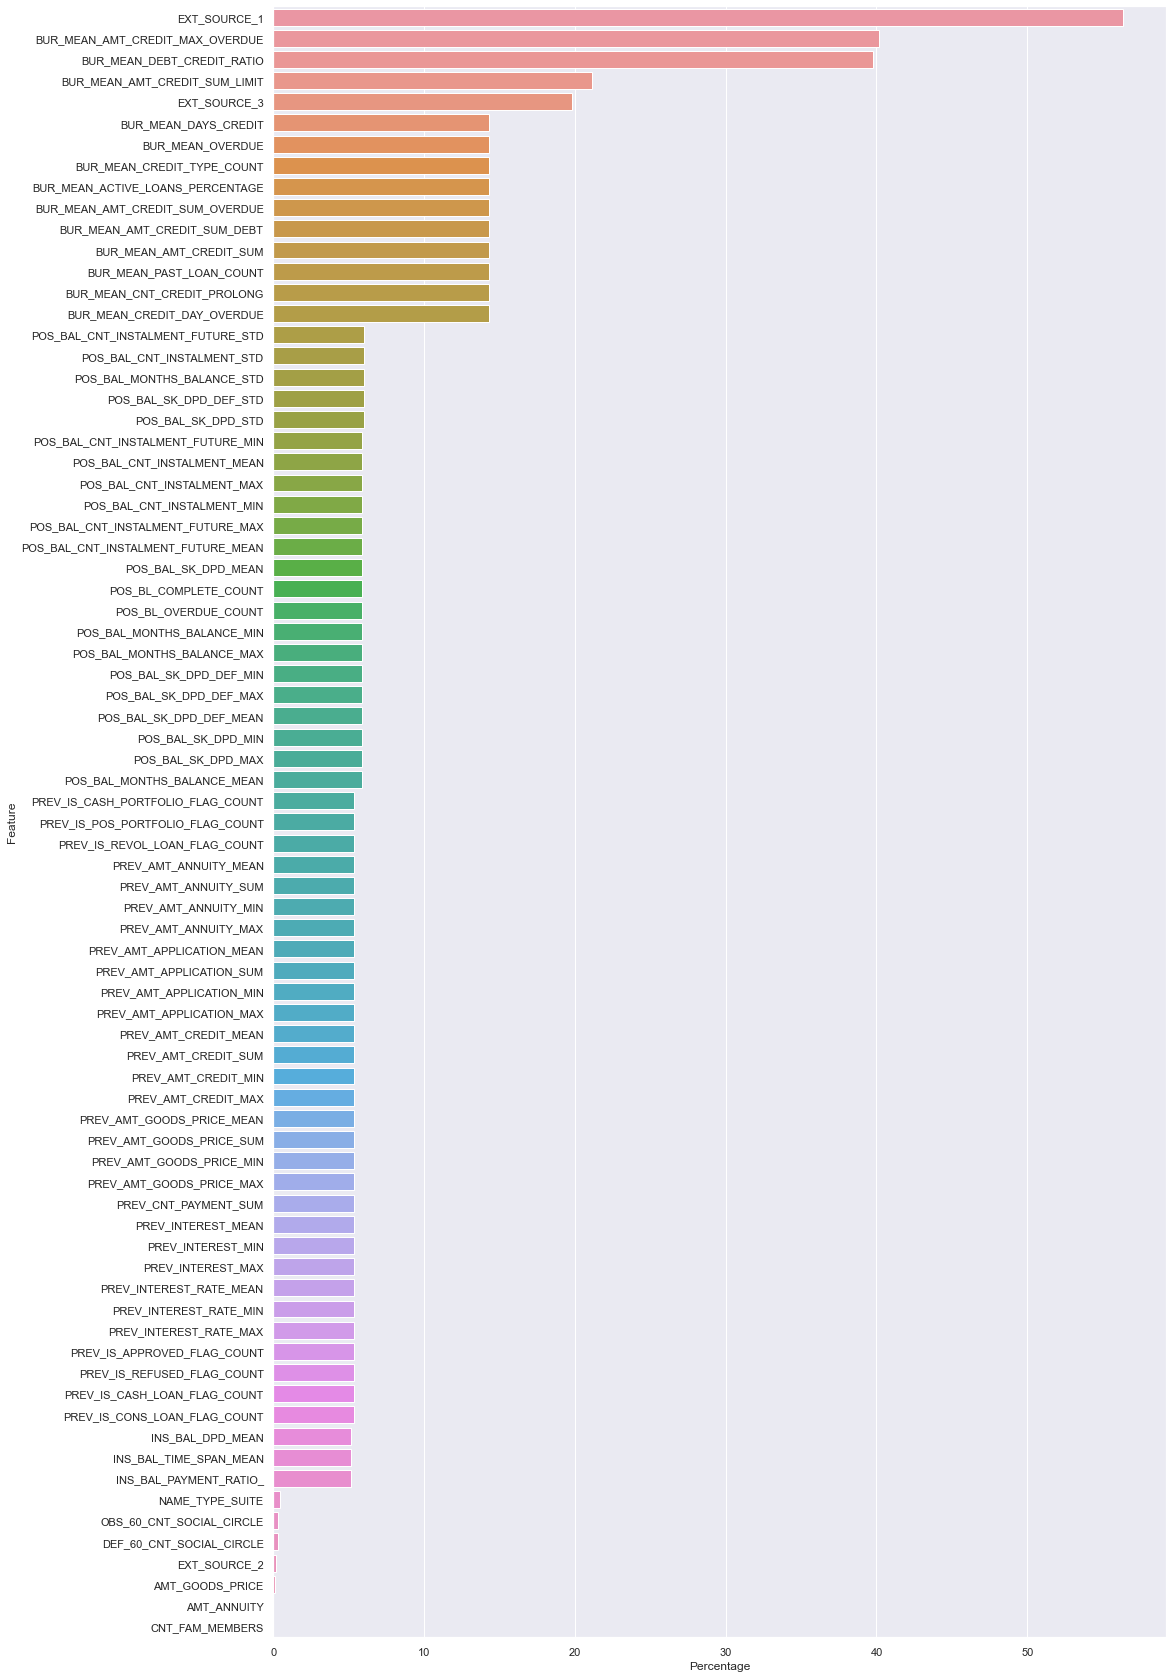

In [130]:
null_df = check_missed_values(df_merged_final)
plt.figure(figsize=(16,30))
sns.barplot(x=  null_df["Percentage"] , y= null_df["Feature"] )

In [131]:
df_merged_final["CNT_FAM_MEMBERS"].fillna(df_merged_final["CNT_FAM_MEMBERS"].mode()[0] , inplace = True)
df_merged_final["NAME_TYPE_SUITE"].fillna(df_merged_final["NAME_TYPE_SUITE"].mode()[0],inplace = True)
df_merged_final["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(df_merged_final["OBS_60_CNT_SOCIAL_CIRCLE"].mode()[0],inplace = True)
df_merged_final["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(df_merged_final["DEF_60_CNT_SOCIAL_CIRCLE"].mode()[0],inplace = True)
df_merged_final["NAME_TYPE_SUITE"].fillna(df_merged_final["NAME_TYPE_SUITE"].mode()[0],inplace = True)
for i in ['BUR_MEAN_ACTIVE_LOANS_PERCENTAGE','BUR_MEAN_CREDIT_TYPE_COUNT','BUR_MEAN_PAST_LOAN_COUNT',
          'BUR_MEAN_AMT_CREDIT_MAX_OVERDUE','BUR_MEAN_CNT_CREDIT_PROLONG','BUR_MEAN_CREDIT_DAY_OVERDUE'
         ,'BUR_MEAN_OVERDUE','BUR_MEAN_AMT_CREDIT_SUM_DEBT','BUR_MEAN_AMT_CREDIT_SUM','BUR_MEAN_DAYS_CREDIT']:
       df_merged_final[i].fillna(value=df_merged_final[i].median(),inplace=True)

df_merged_final.fillna(0, inplace= True)

In [132]:
null_df = check_missed_values(df_merged_final)
null_df

,Feature,Percentage


<AxesSubplot:>

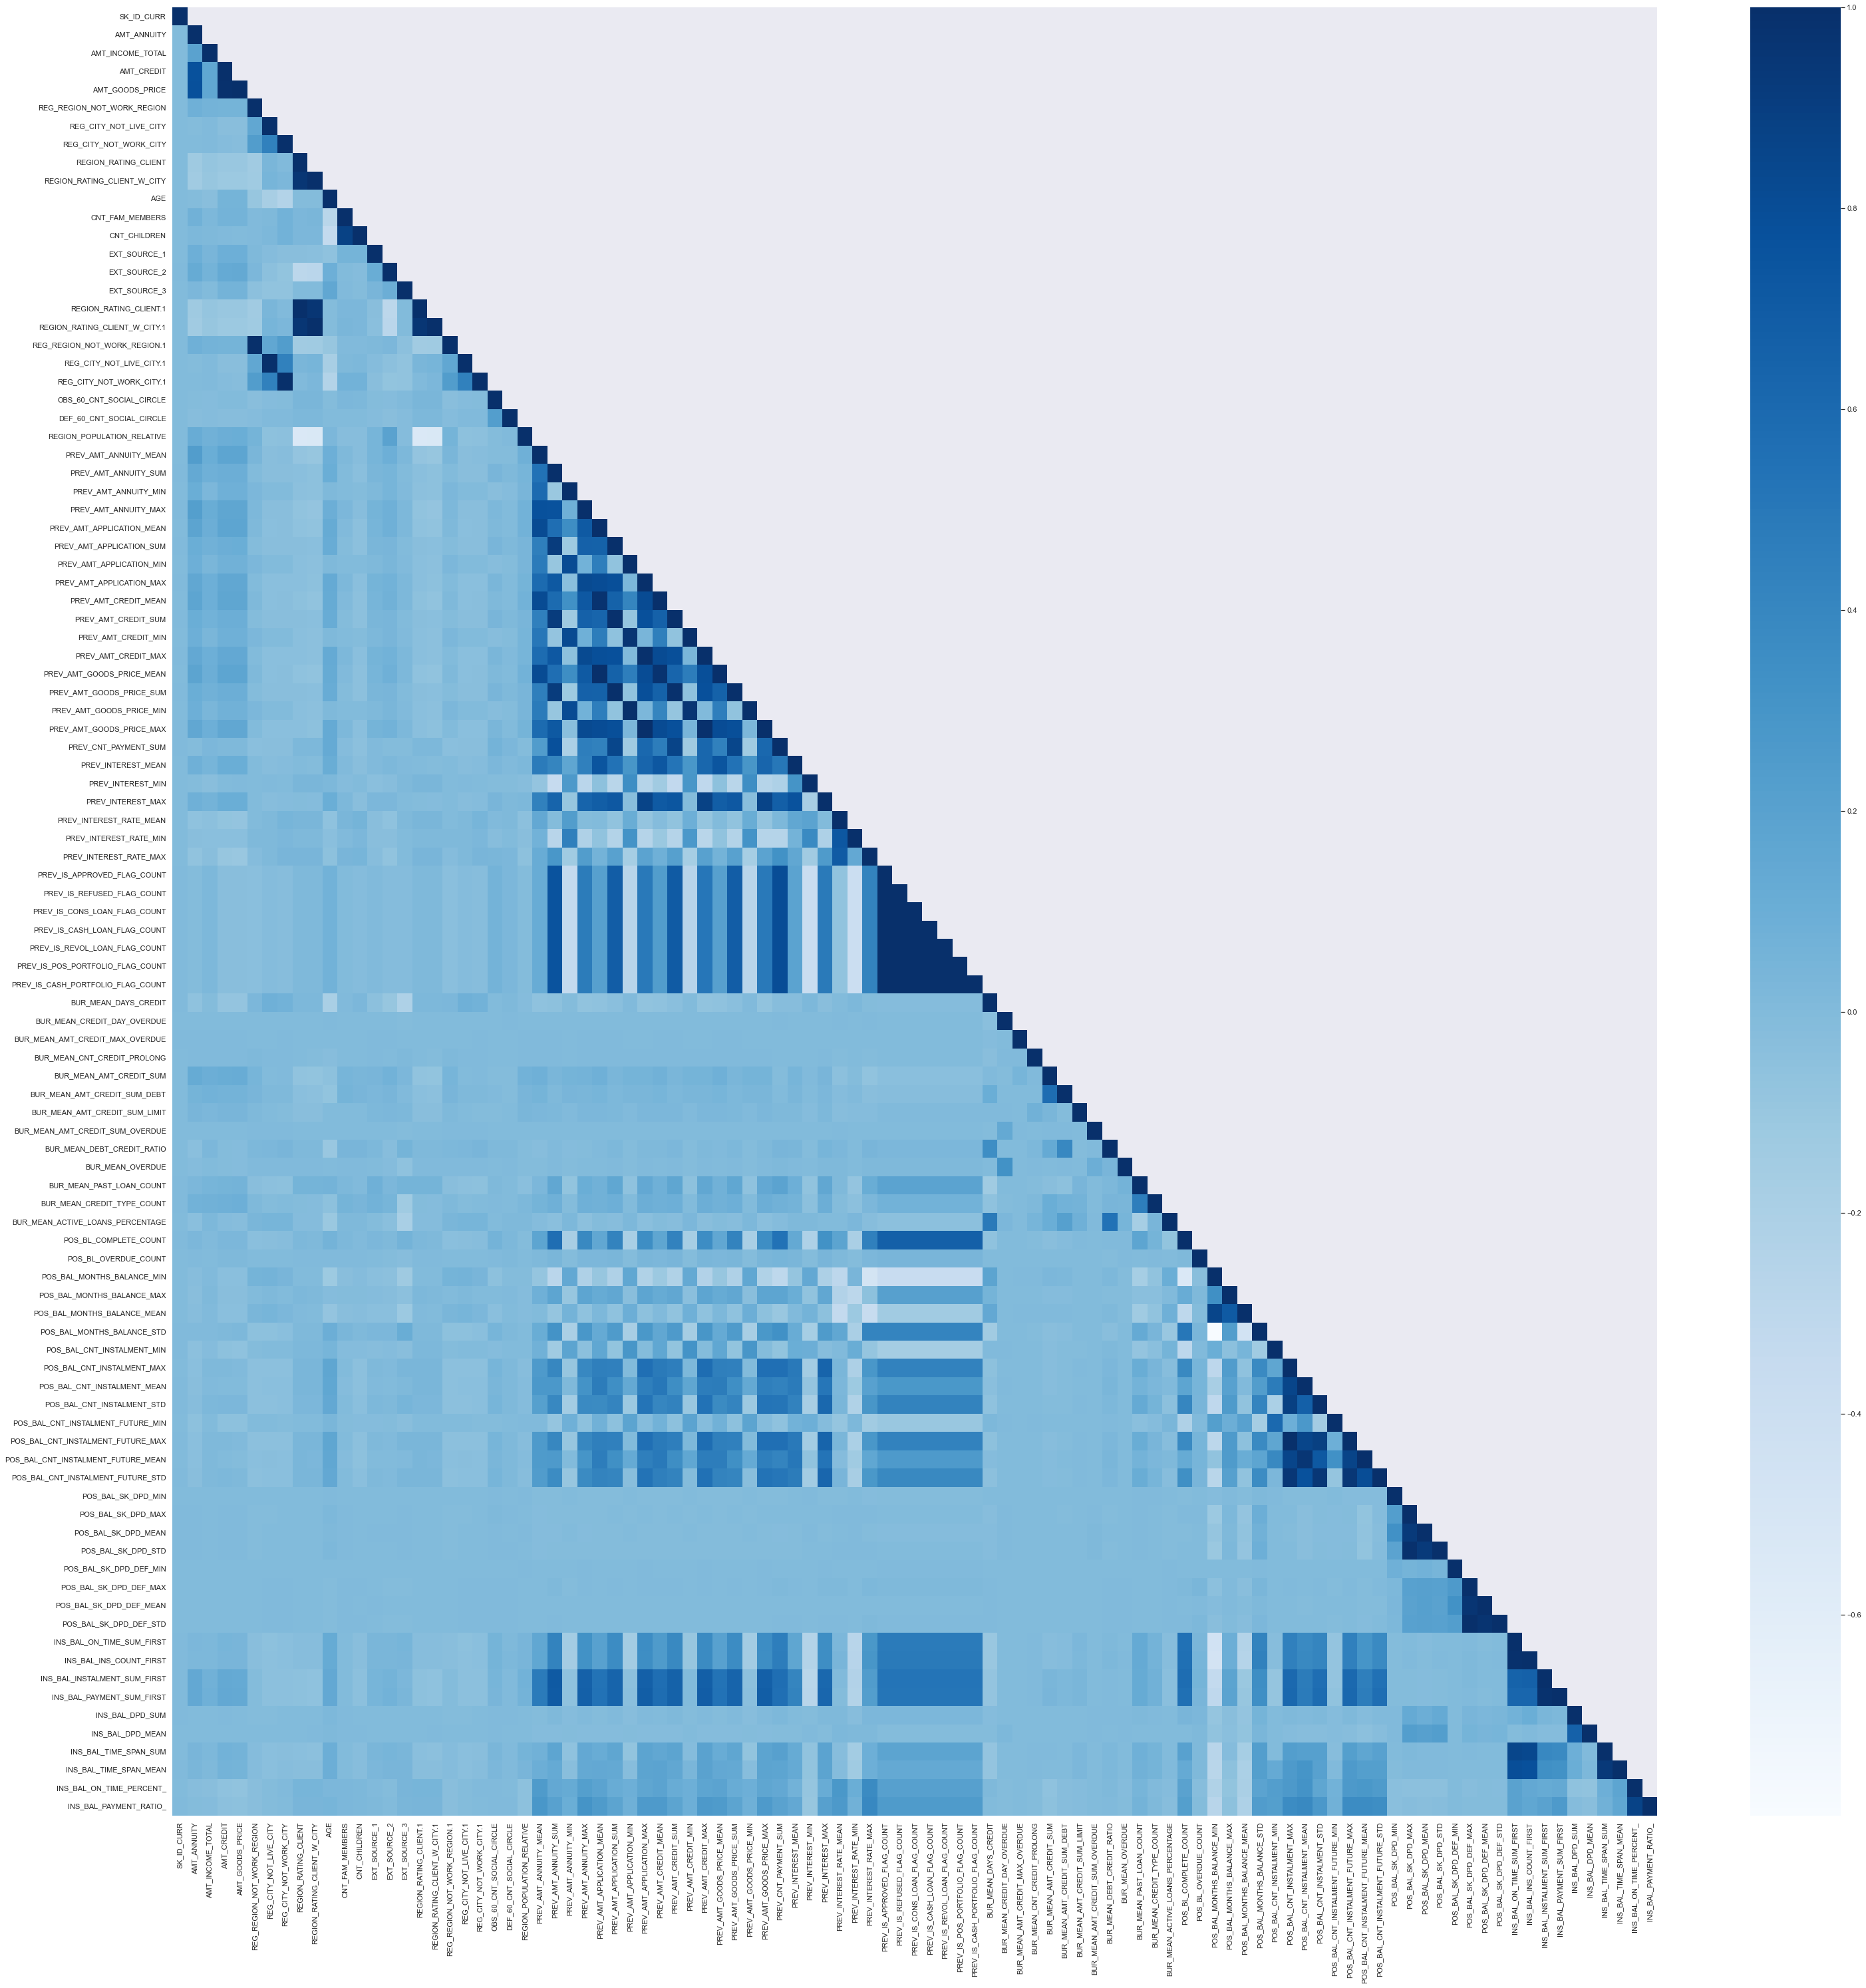

In [133]:
numeric_df = df_merged_final._get_numeric_data()
corr = numeric_df.corr()
mask = np.zeros_like(corr.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(50,50))
sns.heatmap(corr, mask= mask, cmap= "Blues")

In [134]:
corr

,SK_ID_CURR,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,...,INS_BAL_ON_TIME_SUM_FIRST,INS_BAL_INS_COUNT_FIRST,INS_BAL_INSTALMENT_SUM_FIRST,INS_BAL_PAYMENT_SUM_FIRST,INS_BAL_DPD_SUM,INS_BAL_DPD_MEAN,INS_BAL_TIME_SPAN_SUM,INS_BAL_TIME_SPAN_MEAN,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_
SK_ID_CURR,1.000000,-0.000415,-0.001821,-0.000350,-0.000400,0.001095,-0.001888,-0.001588,-0.001067,-0.001130,...,0.003167,0.003186,0.002149,0.002456,0.001802,0.001280,0.000732,0.001698,0.001025,0.001859
AMT_ANNUITY,-0.000415,1.000000,0.191639,0.770079,0.775064,0.079310,-0.006261,0.000860,-0.128455,-0.141613,...,0.024063,0.022225,0.144800,0.145517,-0.001688,-0.003924,0.039006,0.033679,-0.025982,-0.011717
AMT_INCOME_TOTAL,-0.001821,0.191639,1.000000,0.156871,0.159663,0.062341,0.003574,0.006431,-0.085467,-0.091736,...,0.018956,0.018494,0.078939,0.079603,-0.002771,-0.004004,0.016969,0.010685,-0.028448,-0.016441
AMT_CREDIT,-0.000350,0.770079,0.156871,1.000000,0.986689,0.051928,-0.026888,-0.018860,-0.101774,-0.110913,...,0.048786,0.043635,0.137077,0.142867,0.002701,-0.003798,0.065749,0.058427,-0.060310,-0.046164
AMT_GOODS_PRICE,-0.000400,0.775064,0.159663,0.986689,1.000000,0.053098,-0.027230,-0.020462,-0.103718,-0.112166,...,0.043049,0.037807,0.135115,0.141517,0.000980,-0.004737,0.060436,0.052152,-0.064240,-0.049240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INS_BAL_DPD_MEAN,0.001280,-0.003924,-0.004004,-0.003798,-0.004737,-0.002637,-0.003203,-0.000779,0.000805,0.001854,...,-0.008486,0.008409,-0.013810,-0.018578,0.657079,1.000000,0.006798,0.021174,-0.066210,-0.028115
INS_BAL_TIME_SPAN_SUM,0.000732,0.039006,0.016969,0.065749,0.060436,-0.012983,-0.040208,-0.028412,-0.040111,-0.041063,...,0.849562,0.836664,0.392283,0.374469,0.086742,0.006798,1.000000,0.934473,0.092362,0.078671
INS_BAL_TIME_SPAN_MEAN,0.001698,0.033679,0.010685,0.058427,0.052152,-0.014934,-0.040021,-0.025640,-0.027262,-0.027527,...,0.791248,0.777583,0.338384,0.323178,0.106195,0.021174,0.934473,1.000000,0.175685,0.160990
INS_BAL_ON_TIME_PERCENT_,0.001025,-0.025982,-0.028448,-0.060310,-0.064240,-0.029419,-0.006746,0.002847,0.048118,0.047011,...,0.196297,0.145174,0.122027,0.140486,-0.055308,-0.066210,0.092362,0.175685,1.000000,0.866431


In [135]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
to_drop

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT.1',
 'REGION_RATING_CLIENT_W_CITY.1',
 'REG_REGION_NOT_WORK_REGION.1',
 'REG_CITY_NOT_LIVE_CITY.1',
 'REG_CITY_NOT_WORK_CITY.1',
 'PREV_AMT_APPLICATION_SUM',
 'PREV_AMT_CREDIT_MEAN',
 'PREV_AMT_CREDIT_SUM',
 'PREV_AMT_CREDIT_MIN',
 'PREV_AMT_CREDIT_MAX',
 'PREV_AMT_GOODS_PRICE_MEAN',
 'PREV_AMT_GOODS_PRICE_SUM',
 'PREV_AMT_GOODS_PRICE_MIN',
 'PREV_AMT_GOODS_PRICE_MAX',
 'PREV_IS_REFUSED_FLAG_COUNT',
 'PREV_IS_CONS_LOAN_FLAG_COUNT',
 'PREV_IS_CASH_LOAN_FLAG_COUNT',
 'PREV_IS_REVOL_LOAN_FLAG_COUNT',
 'PREV_IS_POS_PORTFOLIO_FLAG_COUNT',
 'PREV_IS_CASH_PORTFOLIO_FLAG_COUNT',
 'POS_BAL_CNT_INSTALMENT_FUTURE_MAX',
 'POS_BAL_CNT_INSTALMENT_FUTURE_MEAN',
 'POS_BAL_CNT_INSTALMENT_FUTURE_STD',
 'POS_BAL_SK_DPD_MEAN',
 'POS_BAL_SK_DPD_STD',
 'POS_BAL_SK_DPD_DEF_MEAN',
 'POS_BAL_SK_DPD_DEF_STD',
 'INS_BAL_INS_COUNT_FIRST',
 'INS_BAL_PAYMENT_SUM_FIRST',
 'INS_BAL_TIME_SPAN_MEAN']

In [136]:
df_merged_final.drop(to_drop, axis=1, inplace= True)

In [137]:
numeric_df = df_merged_final._get_numeric_data()
corr = numeric_df.corr()
corr

,SK_ID_CURR,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REGION_RATING_CLIENT,AGE,CNT_FAM_MEMBERS,...,POS_BAL_SK_DPD_MAX,POS_BAL_SK_DPD_DEF_MIN,POS_BAL_SK_DPD_DEF_MAX,INS_BAL_ON_TIME_SUM_FIRST,INS_BAL_INSTALMENT_SUM_FIRST,INS_BAL_DPD_SUM,INS_BAL_DPD_MEAN,INS_BAL_TIME_SPAN_SUM,INS_BAL_ON_TIME_PERCENT_,INS_BAL_PAYMENT_RATIO_
SK_ID_CURR,1.000000,-0.000415,-0.001821,-0.000350,0.001095,-0.001888,-0.001588,-0.001067,0.001500,-0.002884,...,0.003458,-0.000188,0.000255,0.003167,0.002149,0.001802,0.001280,0.000732,0.001025,0.001859
AMT_ANNUITY,-0.000415,1.000000,0.191639,0.770079,0.079310,-0.006261,0.000860,-0.128455,-0.009421,0.075574,...,0.002827,-0.001523,-0.001925,0.024063,0.144800,-0.001688,-0.003924,0.039006,-0.025982,-0.011717
AMT_INCOME_TOTAL,-0.001821,0.191639,1.000000,0.156871,0.062341,0.003574,0.006431,-0.085467,-0.027261,0.016342,...,-0.002676,-0.000120,-0.001748,0.018956,0.078939,-0.002771,-0.004004,0.016969,-0.028448,-0.016441
AMT_CREDIT,-0.000350,0.770079,0.156871,1.000000,0.051928,-0.026888,-0.018860,-0.101774,0.055434,0.063167,...,0.004748,-0.000709,-0.001217,0.048786,0.137077,0.002701,-0.003798,0.065749,-0.060310,-0.046164
REG_REGION_NOT_WORK_REGION,0.001095,0.079310,0.062341,0.051928,1.000000,0.151396,0.239763,-0.139890,-0.095821,0.003135,...,-0.008122,-0.000583,-0.001946,-0.031144,-0.009552,-0.006933,-0.002637,-0.012983,-0.029419,-0.031244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INS_BAL_DPD_SUM,0.001802,-0.001688,-0.002771,0.002701,-0.006933,-0.006653,-0.003004,0.000085,0.020666,0.001730,...,0.128770,-0.000282,0.038498,0.070633,0.033723,1.000000,0.657079,0.086742,-0.055308,-0.017410
INS_BAL_DPD_MEAN,0.001280,-0.003924,-0.004004,-0.003798,-0.002637,-0.003203,-0.000779,0.000805,0.009940,0.001866,...,0.229209,-0.000255,0.050963,-0.008486,-0.013810,0.657079,1.000000,0.006798,-0.066210,-0.028115
INS_BAL_TIME_SPAN_SUM,0.000732,0.039006,0.016969,0.065749,-0.012983,-0.040208,-0.028412,-0.040111,0.096977,-0.004548,...,0.009007,-0.000933,0.003163,0.849562,0.392283,0.086742,0.006798,1.000000,0.092362,0.078671
INS_BAL_ON_TIME_PERCENT_,0.001025,-0.025982,-0.028448,-0.060310,-0.029419,-0.006746,0.002847,0.048118,0.028037,0.023291,...,-0.047144,-0.003228,-0.020035,0.196297,0.122027,-0.055308,-0.066210,0.092362,1.000000,0.866431


<AxesSubplot:>

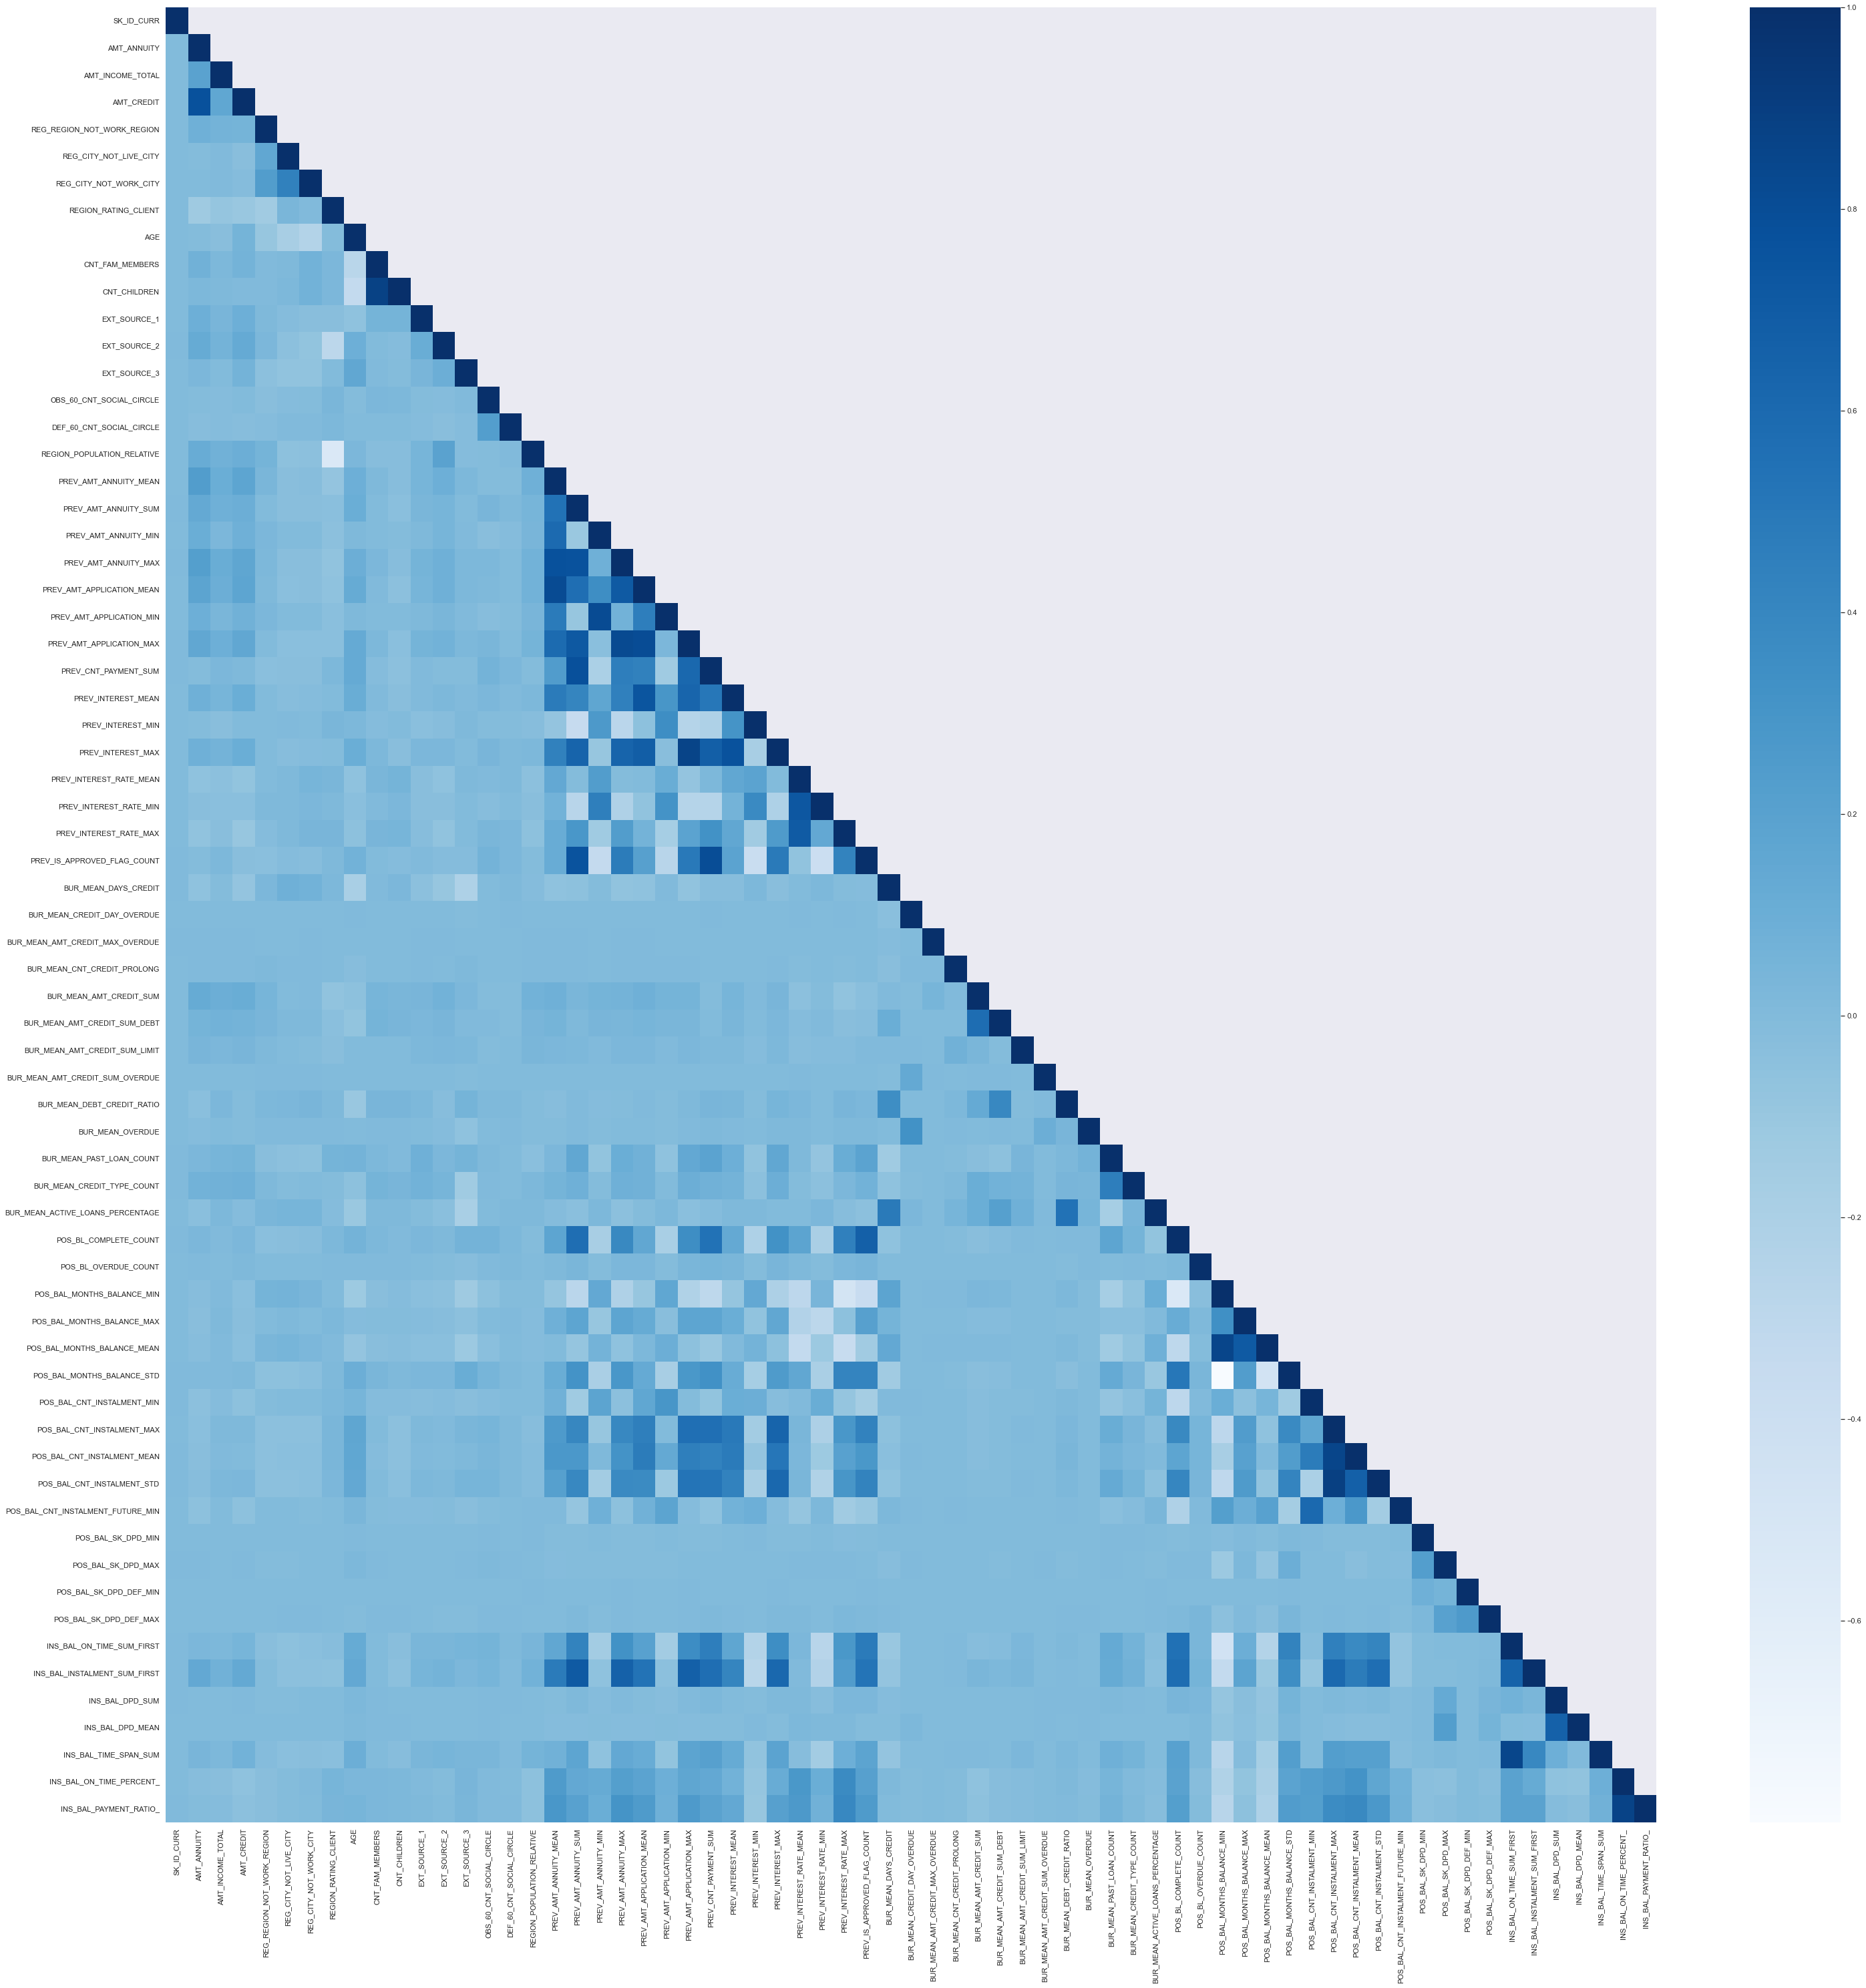

In [140]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False
plt.figure(figsize=(50,50))
sns.heatmap(corr, mask= mask, cmap= "Blues")

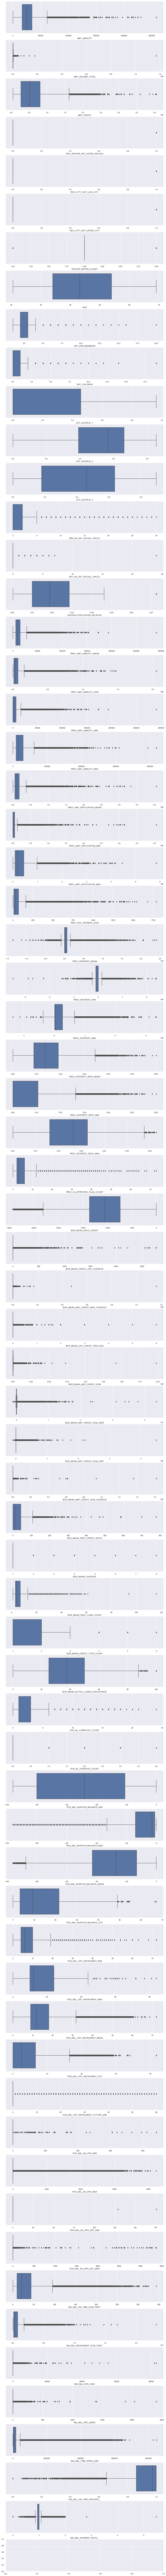

In [141]:
fig, ax = plt.subplots(67,1,figsize=(16, 4 * 67))
for i,j in enumerate(numeric_df.columns[1:]):
    sns.boxplot(df_merged_final[j], ax= ax[i])